In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 93% 307M/330M [00:02<00:00, 108MB/s]
100% 330M/330M [00:02<00:00, 157MB/s]


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image

In [5]:
# Generators
train_ds  = keras.utils.image_dataset_from_directory(
    directory = "/content/Face Mask Dataset/Train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)
validation_ds  = keras.utils.image_dataset_from_directory(
    directory = "/content/Face Mask Dataset/Test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 10000 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid",input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation = "sigmoid"))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:
record = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
313/313 [==============================] - 44s 98ms/step - loss: 0.1838 - accuracy: 0.9277 - val_loss: 0.1037 - val_accuracy: 0.9688
Epoch 2/10
313/313 [==============================] - 32s 102ms/step - loss: 0.0903 - accuracy: 0.9709 - val_loss: 0.0665 - val_accuracy: 0.9778
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.0641 - accuracy: 0.9776 - val_loss: 0.0717 - val_accuracy: 0.9788
Epoch 4/10
313/313 [==============================] - 38s 118ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.0641 - val_accuracy: 0.9829
Epoch 5/10
313/313 [==============================] - 34s 108ms/step - loss: 0.0331 - accuracy: 0.9880 - val_loss: 0.0662 - val_accuracy: 0.9758
Epoch 6/10
313/313 [==============================] - 31s 97ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0746 - val_accuracy: 0.9748
Epoch 7/10
313/313 [==============================] - 28s 90ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0409 - val_accur

In [11]:
loss ,acc = model.evaluate(validation_ds)

31/31 [==============================] - 2s 42ms/step - loss: 0.0662 - accuracy: 0.9869


In [ ]:
plt.plot(record.history["accuracy"],label="Training Accuracy",color="red")
plt.plot(record.history["val_accuracy"],label="Testing Accuracy",color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(record.history["loss"],label="Training Loss",color="red")
plt.plot(record.history["val_loss"],label="Testing Loss",color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step
Mask Detected


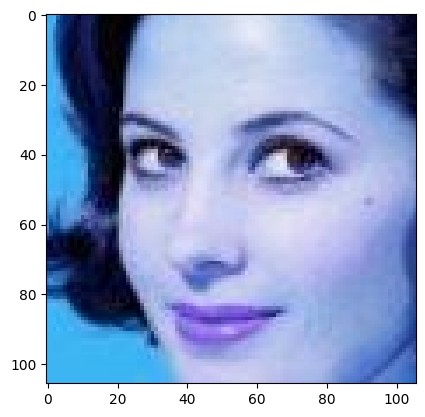

In [25]:
#Testing
import cv2
test_img = cv2.imread("/content/Face Mask Dataset/Test/WithoutMask/1808.png")
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_img = test_img/255
test_input = test_img.reshape((1,256,256,3))
output = model.predict(test_input)
if output[0][0]>0.5:
  print("No Mask Detected")
else:
  print("Mask Detected")

In [18]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/face-mask-dataset.zip